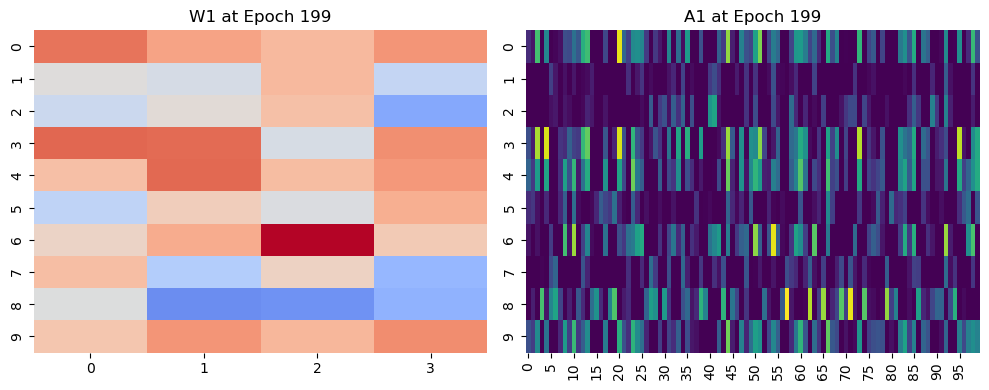

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from NN import NeuralNet

# ----- Training -----
X = np.random.randn(4, 100)
y = (np.sum(X, axis=0, keepdims=True) > 0).astype(float)
model = NeuralNet(input_size=4, hidden_size=10)

epochs = 200
learning_rate = 0.025

W1_snapshots = []
A1_snapshots = []

for epoch in range(epochs):
    _ = model.forward(X)
    model.back_prop(X, y, learning_rate=learning_rate)

    # Store snapshots for animation
    W1_snapshots.append(model.W1.copy())
    A1_snapshots.append(model.A1.copy())

# ----- Animation -----
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

def update(frame):
    axs[0].clear()
    axs[1].clear()

    sns.heatmap(W1_snapshots[frame], ax=axs[0], cmap="coolwarm", center=0, cbar=False)
    axs[0].set_title(f"W1 at Epoch {frame}")

    sns.heatmap(A1_snapshots[frame], ax=axs[1], cmap="viridis", cbar=False)
    axs[1].set_title(f"A1 at Epoch {frame}")

ani = FuncAnimation(fig, update, frames=epochs, interval=100)
ani.save("training_animation.gif", writer="pillow", fps=10)
plt.tight_layout()
print("ding")

this shows how strongly a neuron connects to an input feature via the evolution of W1

and whether a neuron fired during the classification of a training sample. Neurons pick up on patterns so one that fires across most samples may have learneda dominant feature. (cross refernce the 2 figures to confirm!)